In [2]:
import pandas as pd
import numpy as np
from ipykernel import kernelapp as app

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

auto = pd.read_csv('automobile.txt', sep=',')
auto.head()

In /home/kagiso/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/kagiso/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/kagiso/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>Cleaning Data <b>

Before cleaning the data we need to establish the data types of each column in order to understand how we can clean it

In [3]:
#Obtaining the datatypes of automobile
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
#Next we find if there are null values in the dataset
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<b> Missing Data <b>

As we can see that the null values are represented as '?'. So we need a different approach to check the missing values.

In [5]:
# Check if field equal ?
temp_auto = auto == '?'
temp_auto.sum()

/home/kagiso/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

How we are going to deal with the missing data is find the mean of the column and replace the '?' with the mean. Let us start with the column with the most number of '?' which is 'normalized-loss' abd then continue with the rest.

In [6]:
# Create a table with no '?' contained
normalized_ = auto['normalized-losses'].loc[auto['normalized-losses']!='?']
#Convert it to integer and find the mean
normalized_mean = normalized_.astype(str).astype(int).mean()
# Replace all the question marks with the mean
auto['normalized-losses'] = auto['normalized-losses'].replace('?', normalized_mean).astype(int)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Create a table with no '?' contained
price_ = auto['price'].loc[auto['price']!='?']
#Convert it to integer and find the mean
price_mean = price_.astype(str).astype(int).mean()
# Replace all the question marks with the mean
auto['price'] = auto['price'].replace('?', price_mean).astype(int)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Create a table with no '?' contained
horsepower_ = auto['horsepower'].loc[auto['horsepower']!='?']
#Convert it to integer and find the mean
horsepower_mean = horsepower_.astype(str).astype(int).mean()
# Replace all the question marks with the mean
auto['horsepower'] = auto['horsepower'].replace('?', horsepower_mean).astype(int)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# Convert non-numeric value to the datatype
auto['bore'] = pd.to_numeric(auto['bore'], errors='coerce')

In [10]:
# Convert non-numeric value to the datatype
auto['stroke'] = pd.to_numeric(auto['stroke'], errors='coerce')

In [11]:
# Convert non-numeric value to the datatype
auto['peak-rpm'] = pd.to_numeric(auto['peak-rpm'], errors='coerce')

In [12]:
#Remove data with the question mark 
auto = auto[auto['num-of-doors'] != '?']

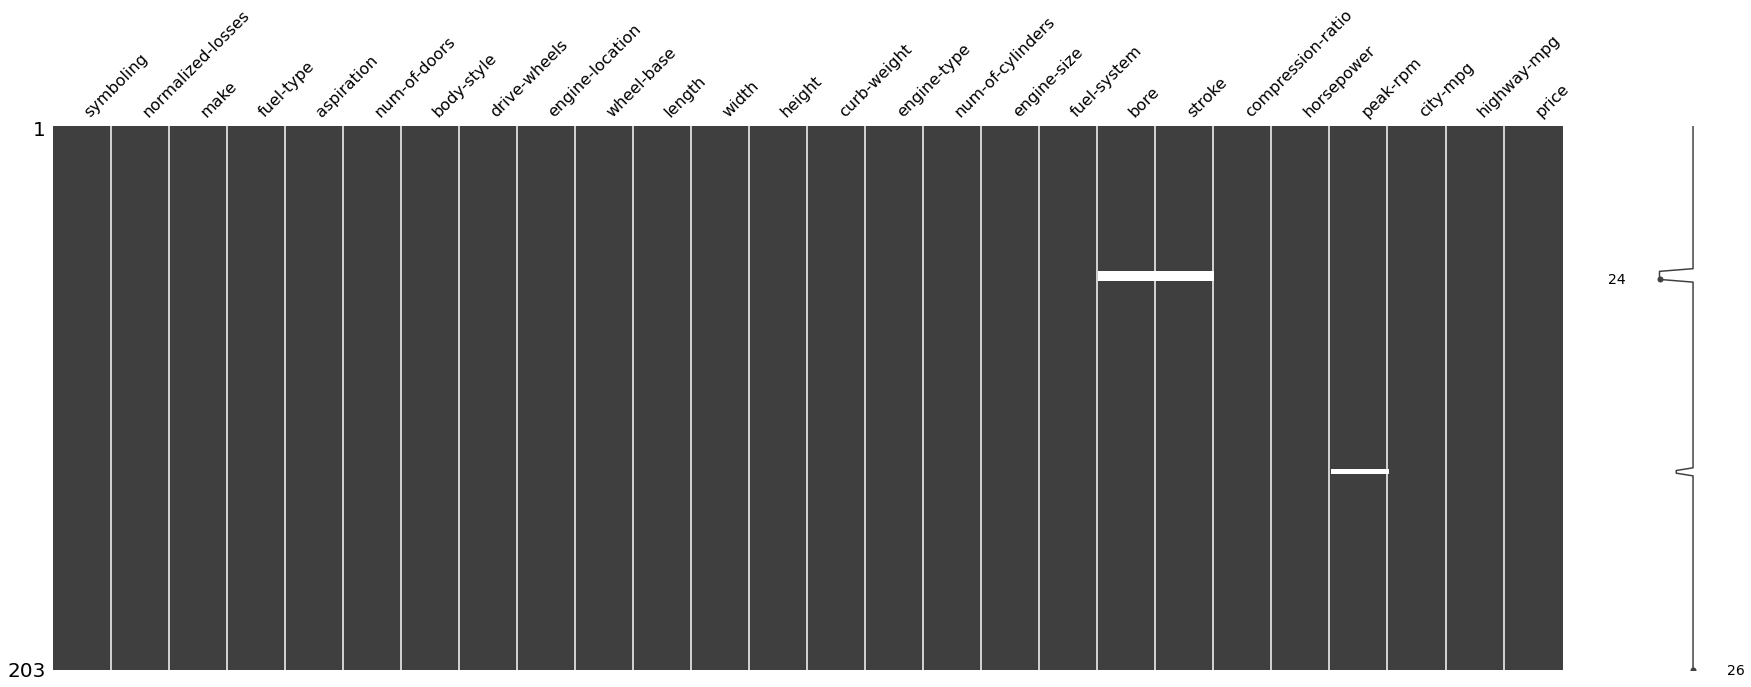

In [13]:
# Plot graphic of missing values
missingno.matrix(auto, figsize = (30,10))

As we can see there is still missing data on the dataset.

In [14]:
# replace all NA's the value that comes directly after it in the same column
auto = auto.fillna(method='bfill', axis=0).fillna(0)

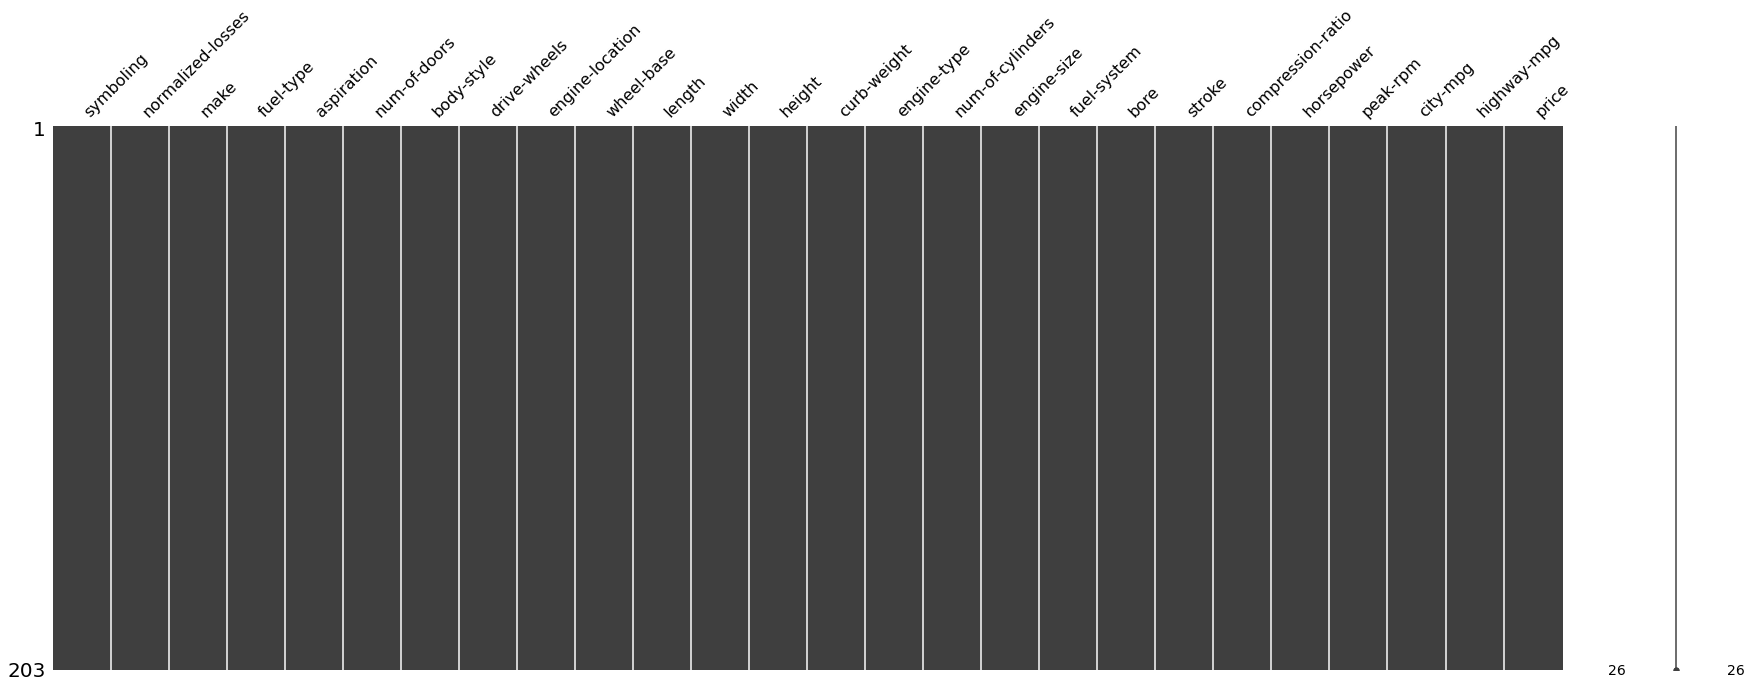

In [15]:
# Plot graphic of missing values 
missingno.matrix(auto, figsize = (30,10))

# DATA STORIES AND VISUALIZATIONS

Text(0.5, 0, 'Make')

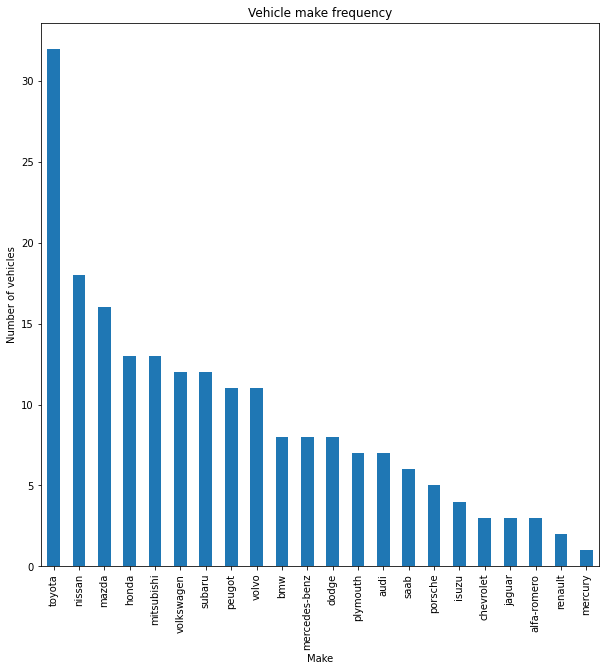

In [16]:
#Vehicle make frequency diagram
auto.make.value_counts().plot(kind='bar', figsize=(10,10))
plt.title("Vehicle make frequency")
plt.ylabel("Number of vehicles")
plt.xlabel("Make")

As we can see there are more cars made by Toyota than any other car. The least manufactored car is the mercury, It is not as big of a company like Toyota which has been in the industry for years

Text(0.5, 0, 'Fuel Type')

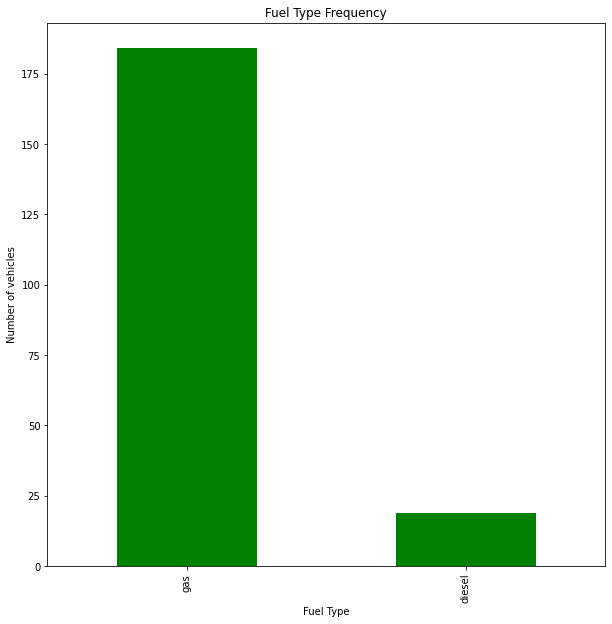

In [17]:
#Vehicle make frequency diagram
auto['fuel-type'].value_counts().plot(kind='bar', color='green', figsize=(10,10))
plt.title("Fuel Type Frequency")
plt.ylabel("Number of vehicles")
plt.xlabel("Fuel Type")

More cars use gas than diesel because petrol is cheaper than diesel fuel and cars tend to be cheaper to buy and service.

Text(0.5, 0, 'Fuel Type')

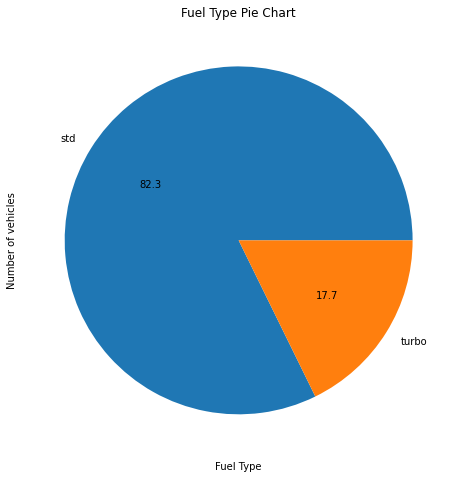

In [18]:
#Vehicle make frequency diagram
auto['aspiration'].value_counts().plot.pie(figsize=(8,8), autopct='%.1f')
plt.title("Fuel Type Pie Chart")
plt.ylabel("Number of vehicles")
plt.xlabel("Fuel Type")

The reason less cars use turbo is because the majority of cars are standard and cheape. Turbo unstalled cars are usually more expensive than other cars.

Text(0.5, 0, 'Drive wheel')

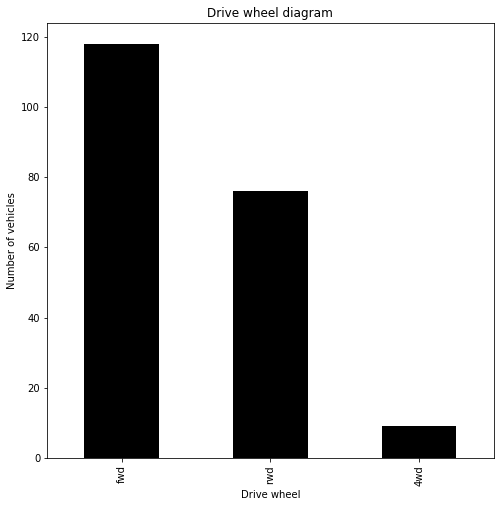

In [19]:
#Vehicle make frequency diagram
auto['drive-wheels'].value_counts().plot(kind='bar', color="black", figsize=(8,8))
plt.title("Drive wheel diagram")
plt.ylabel("Number of vehicles")
plt.xlabel("Drive wheel")

Text(0.5, 0, 'Number of Doors')

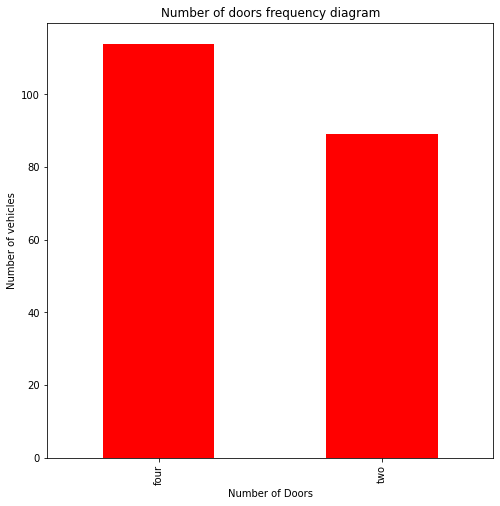

In [20]:
#Vehicle make frequency diagram
auto['num-of-doors'].value_counts().plot(kind='bar', color="red", figsize=(8,8))
plt.title("Number of doors frequency diagram")
plt.ylabel("Number of vehicles")
plt.xlabel("Number of Doors")

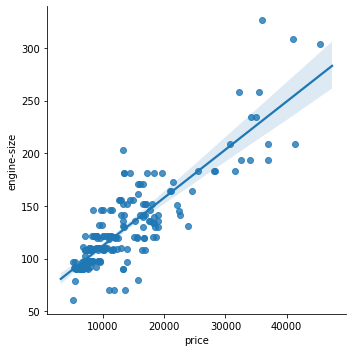

In [21]:
g = sns.lmplot('price', 'engine-size', auto)

This shows the relationship between price and engine size. It is clear that the larger engines are more expensive. They use more parts to use for the engine.

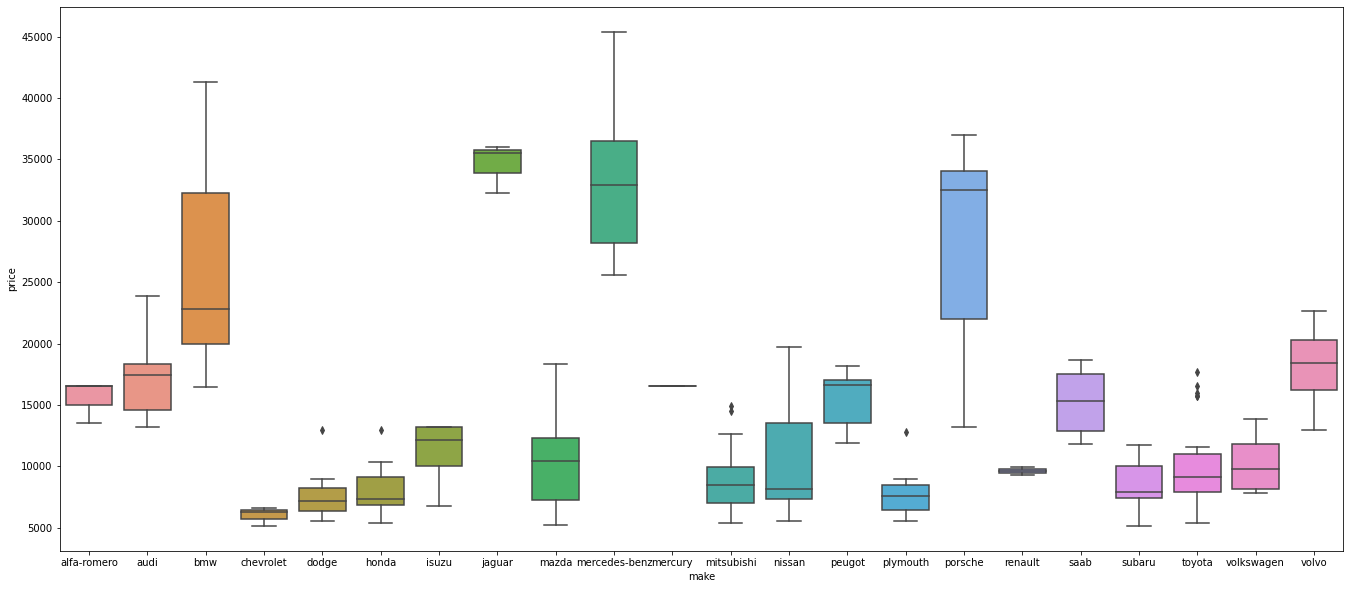

In [24]:
plt.rcParams['figure.figsize']=(23, 10)
ax = sns.boxplot(x='make', y='price', data=auto)

Here we can see that the most bought cars are also the cheapest cars making them affordable to the population at large.